In [14]:
import os
from tkinter import Tk, filedialog
import shutil

def get_next_image_number():
    image_files = [f for f in os.listdir("images") if os.path.isfile(os.path.join("images", f))]
    image_numbers = [int(f.split("-")[1].split(".")[0]) for f in image_files if f.startswith("img-")]
    next_number = max(image_numbers) + 1 if image_numbers else 1
    return next_number

def upload_image():
    root = Tk()
    root.withdraw()

    image_path = filedialog.askopenfilename(title="Select Image File", filetypes=(("Image Files", "*.png *.jpg *.jpeg *.gif *.bmp"), ("All Files", "*.*")))

    if image_path:
        image_filename = os.path.basename(image_path)
        image_number = get_next_image_number()
        target_filename = f"img-{image_number}{os.path.splitext(image_filename)[1]}"
        target_path = os.path.join("images", target_filename)

        try:
            shutil.move(image_path, target_path)
            print(f"Image uploaded successfully as {target_filename}!")
        except:
            print("An error occurred while uploading the image.")
    else:
        print("No file selected.")

def main():
    user_input = input("Enter 1 to upload an image, or 0 to exit: ")
    if user_input == "1":
        upload_image()
    elif user_input == "0":
        print("Not uploading an image.")
    else:
        print("Invalid input.")

if __name__ == "__main__":
    main()

Image uploaded successfully as img-3.jpg!


In [15]:
!pip install easyocr
!pip install imutils
!pip install opencv-python-headless
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

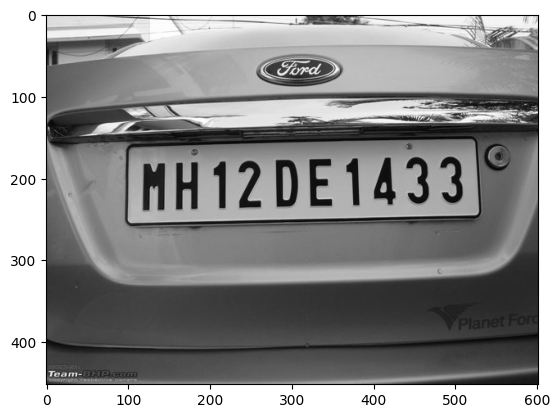

In [19]:
img = cv2.imread('./images/img-3.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

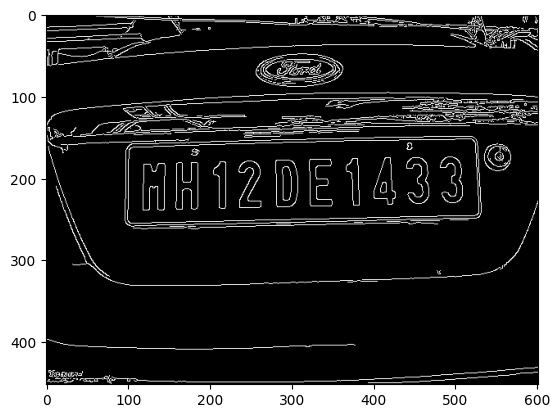

In [20]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [6]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [7]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [8]:
location

array([[[ 50,  14]],

       [[ 54, 317]],

       [[552, 311]],

       [[550,  14]]], dtype=int32)

In [9]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

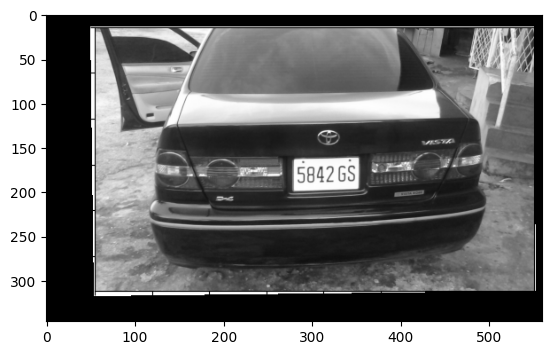

In [10]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [11]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

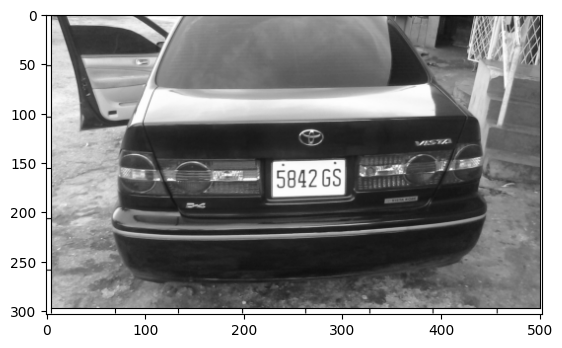

In [12]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [13]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
# print(result[0][1])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [14]:
import json

# Load JSON data from file
with open('./user.json') as f:
    data = json.load(f)

# Define a function to check if a car number is in the JSON data
def check_car_number(car_number):
    return any(entry.get('car_number') == car_number for entry in data)

# Example usage
car_number = result[0][1]
if check_car_number(car_number):
    print(f"{car_number} is present in the JSON data!")
else:
    print(f"{car_number} is not present in the JSON data.")

5842 GS is present in the JSON data!


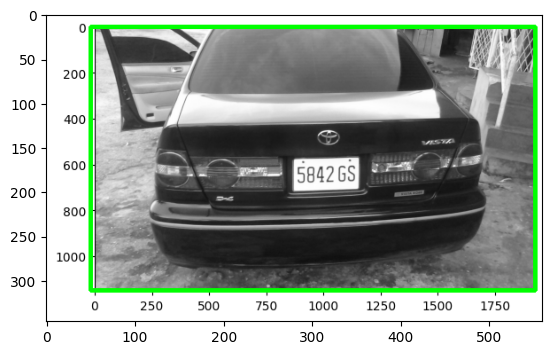

In [17]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, 
                  org=(approx[0][0][0], 
                  approx[1][0][1]+60), 
                  fontFace=font,
                  fontScale=1,
                  color=(0,255,0), 
                  thickness=2, 
                  lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))